In [352]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Question 1
Write the python code to calculate and plot the thrust required curve at an altitude of 30,000 ft, Assuming a weight of 33112Kg. Airplane data: S = 88.25 $m^2$, AR= 5.92, $C_{D,o} = 0.015$, and K = 0.08. Choose velocity range from 300 m/s to 1300 m/s with interval of 100m/s.

In [353]:
rho = 0.458715 #kg m^-3
w = 33112 * 9.80665 #kg to N
s = 88.25 #m^2
ar = 5.92
cdo = 0.015
k = 0.08

In [354]:
vinf = np.arange(300, 1301, 100)
cl = (2 * w) / (rho * (vinf ** 2) * s)
cd = cdo + (k * (cl ** 2))
tr = 0.5 * rho * (vinf ** 2) * s * cd #Since TR = D in a steady level flight
pr = tr * vinf

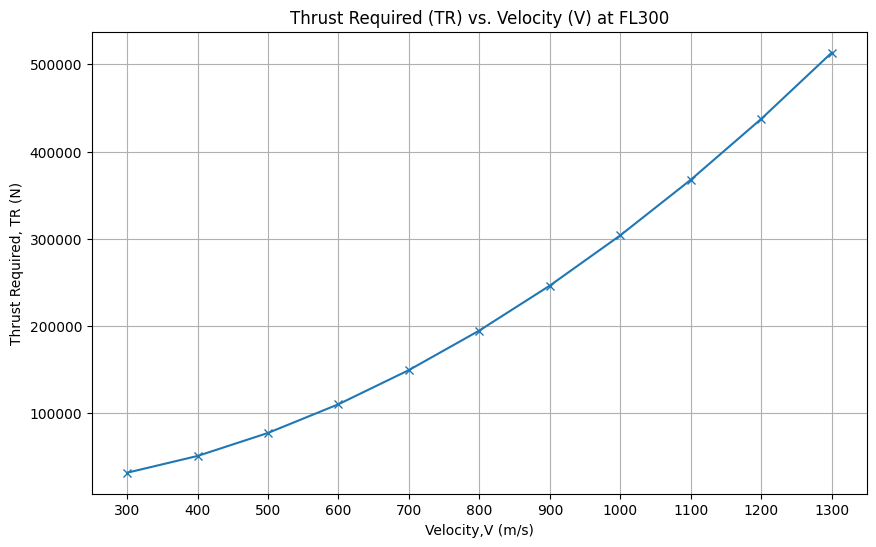

In [355]:
plt.figure(figsize=(10, 6))
plt.plot(vinf, tr, marker='x')
plt.title("Thrust Required (TR) vs. Velocity (V) at FL300")
plt.xlabel("Velocity,V (m/s)")
plt.ylabel("Thrust Required, TR (N)")
plt.xticks(np.arange(300, 1301, 100))
plt.grid(True)
plt.show()

# Question 2
A certain jet aircraft has the following data, Weight = 50000N, thrust T = 14500N, $C_D$ = 0.02 + 0.04 $CL^2$, $C_{L,max}$ = 1.2 and wing area S = 30 $m^2$. Assume an obstacle height of 15m(50feet) and $\mu$ = 0.05 write python code to calculate the total takeoff distance and time at sea level.

In [356]:
w = 50000 #N
t = 14500 #N
cdo = 0.02
k = 0.04
clmax = 1.2
s = 30 #m^2
h_ob = 15 #m
mu = 0.05
g = 9.80665
rho = 1.225 #kg m^-3
n = 3 #considered as a large aircraft due to the large weight

In [357]:
vstall = math.sqrt((2 * w) / (rho * s * clmax))
vto = 1.2 * vstall
vinf = 0.7 * vto
d = 0.5 * rho * (vinf ** 2) * s * (cdo  + k * ((clmax) ** 2))
l = 0.5 * rho * (vinf ** 2) * s * clmax
sg = (1.44 * w * (w / s) ) / (g * rho * clmax * (t - d - mu * (w - l))) + (n * vto)
r = 3.9 * (vstall ** 2) / g
theta_ob = math.acos(1 - (h_ob / r))
sa = r * math.sin(theta_ob)
s = sa + sg
time = s / vinf
print(f'Ground roll: {sg}m')
print(f'Airborne distance: {sa}m')
print(f'Total T/O distance: {s}m')
print(f'Total T/O time: {time}s')

Ground roll: 896.3726591140086m
Airborne distance: 163.79467465810134m
Total T/O distance: 1060.16733377211m
Total T/O time: 26.50418334430275s


# Question 3
A turbojet engine airplane weighs 80343.9N, has wing area 37.2 $m^2$ and has TSFC = 1.3N/Nh at altitude of 10km($\rho$ = 0.458 $kg/m^3$). The airplane drag polar is given by $C_D$ = 0.02 + 0.04 $C_L^2$.

1. Write python code to calculate the fuel loads for range of 2400km

1. Write python code to calculate the fuel loads for endurance of 5 hour

In [358]:
w_0 = 80343.9 #N
s = 37.2 #m^2
ct = 1.3 / 3600 #from hr to s
rho = 0.458
cdo = 0.02 
k = 0.04 
r = 2400 * 1000 #km to m
e = 5 * 3600 #hr to s

In [359]:
cl_2 = math.sqrt(cdo / (3 * k))
cd_2 = cdo + (k * ((1 / 3) ** 2))
w_1 = (math.sqrt(w_0) - ((((r * ct) / 2) * math.sqrt((rho * s) / 2)) * (cd_2 / math.sqrt(cl_2)))) ** 2
wf_r = w_0 - w_1
print(f'Weight of fuel required for a range of 2400 km: {wf_r}N')

Weight of fuel required for a range of 2400 km: 25089.31932460836N


In [360]:
cl = math.sqrt(cdo / k)
cd = 2 * cdo
w_1 = w_0 / (math.exp(e * ct * (cd / cl)))
wf_e = w_0 - w_1
print(f'Weight of fuel required for endurance of 5 hours: {wf_e}N')

Weight of fuel required for endurance of 5 hours: 24719.572794833162N
